# Spectrogram of Rain and Pink Noise

## Import library

In [1]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#!pip install pydub
#from pydub import AudioSegment

## Convert file (optional)

Converting .m4a file to .wav

In [3]:
#sound = AudioSegment.from_file('SuaraHujan_2.m4a', 'm4a')
#sound.export('rain.wav', format="wav")

## Check audio

In [4]:
from IPython.display import Audio
folder = 'audio/'
Audio(folder+'pink_noise.wav')

## Visualization

In [5]:
# Function source: https://www.kaggle.com/davids1992/speech-representation-and-data-exploration

def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [6]:
def plot_spectrogram(folder, file, window_size=20, step_size=10, 
                     savefig=True, stereo=False):
  sample_rate, samples = wavfile.read(folder+file)

  if stereo==True:
    samples = samples[:,0]

  freqs, times, spectrogram = log_specgram(samples, sample_rate, window_size=window_size, step_size=step_size)

  plt.figure(figsize=(14, 8))
  plt.imshow(spectrogram.T, aspect='auto', origin='lower', 
            extent=[times.min(), times.max(), freqs.min(), freqs.max()], cmap='jet')
  plt.colorbar()
  plt.title('Spectrogram of ' + file)
  plt.ylabel('Freqs in Hz')
  plt.xlabel('Seconds')
  if savefig==True:
      plt.savefig('plot/%s_spectrogram.png'%(file), dpi=300)
  plt.show()

<ipython-input-6-3707ef51bd58>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(folder+file)


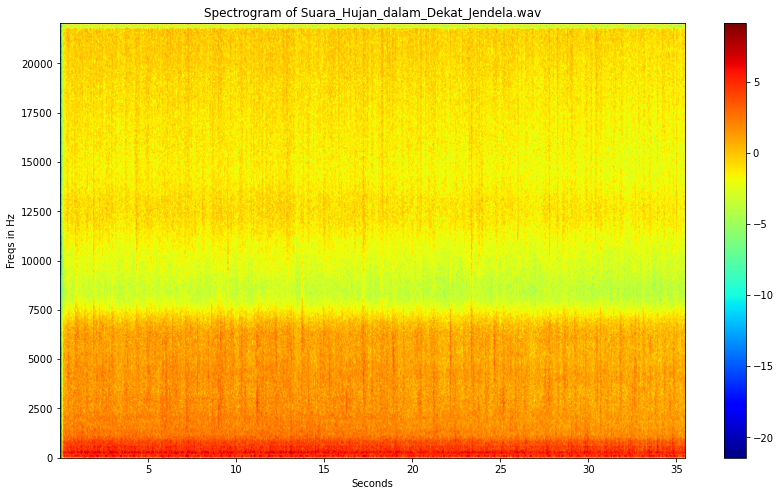

In [7]:
# Rain spectrogram

plot_spectrogram(folder, 'Suara_Hujan_dalam_Dekat_Jendela.wav')

<ipython-input-6-3707ef51bd58>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(folder+file)


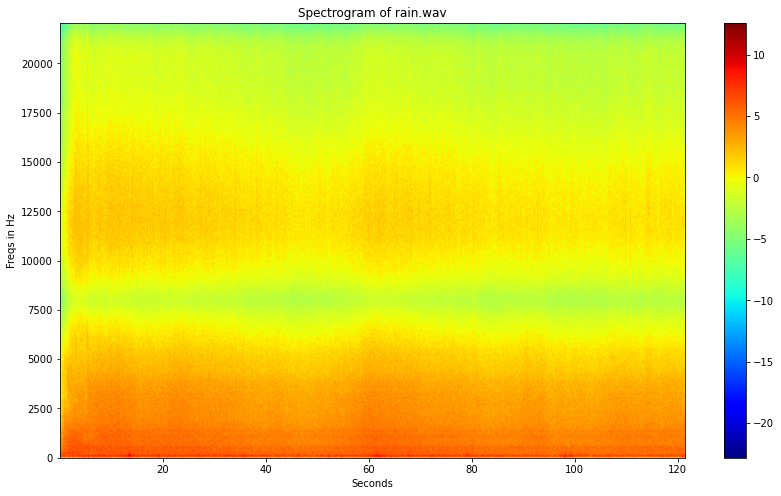

In [8]:
# Rain spectrogram

plot_spectrogram(folder, 'rain.wav')

<ipython-input-6-3707ef51bd58>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(folder+file)


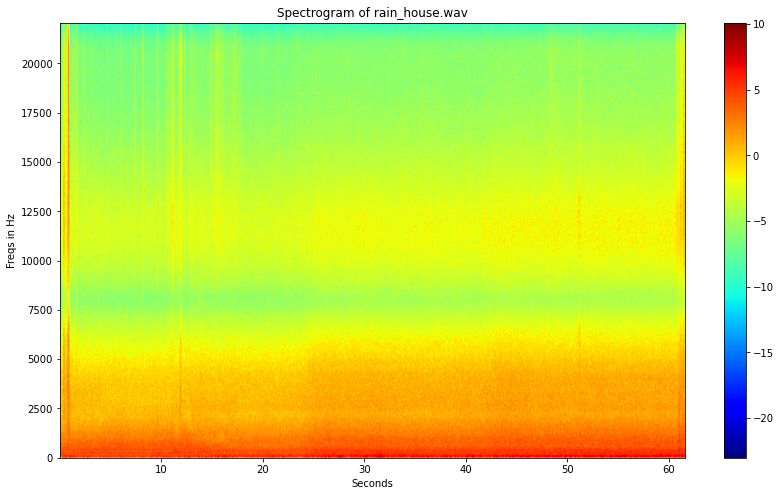

In [9]:
# Rain (at house) spectrogram

plot_spectrogram(folder, 'rain_house.wav')

<ipython-input-6-3707ef51bd58>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(folder+file)


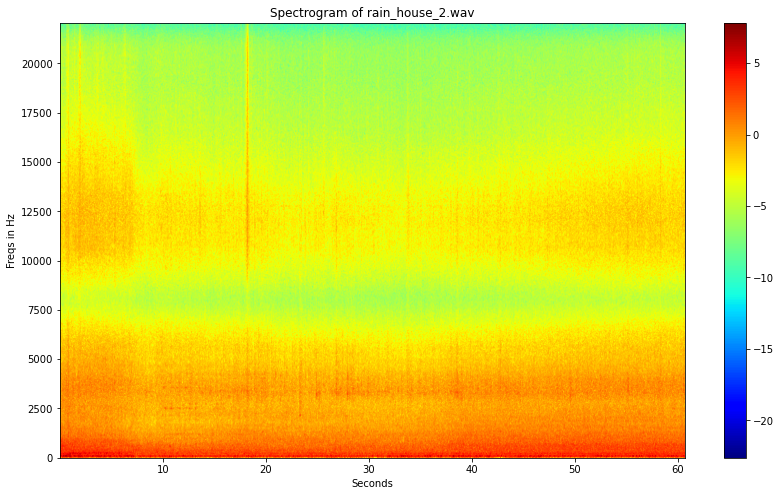

In [10]:
# Rain (at house 2) spectrogram

plot_spectrogram(folder, 'rain_house_2.wav')

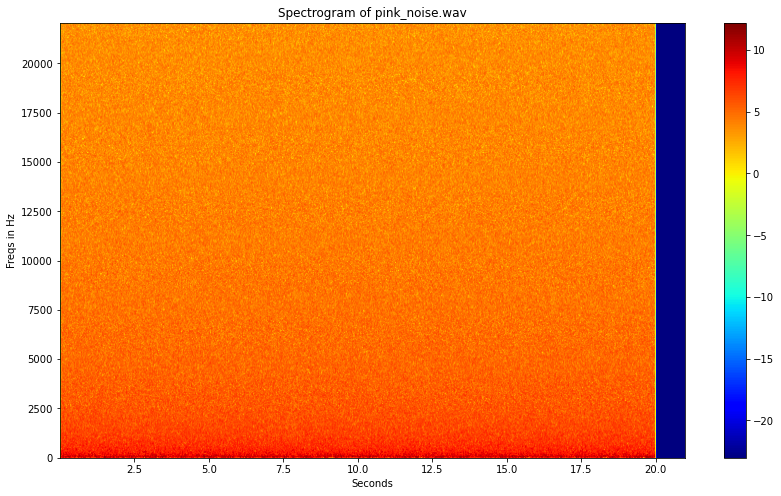

In [11]:
# Pink noise spectrogram

plot_spectrogram(folder, 'pink_noise.wav', stereo=True)

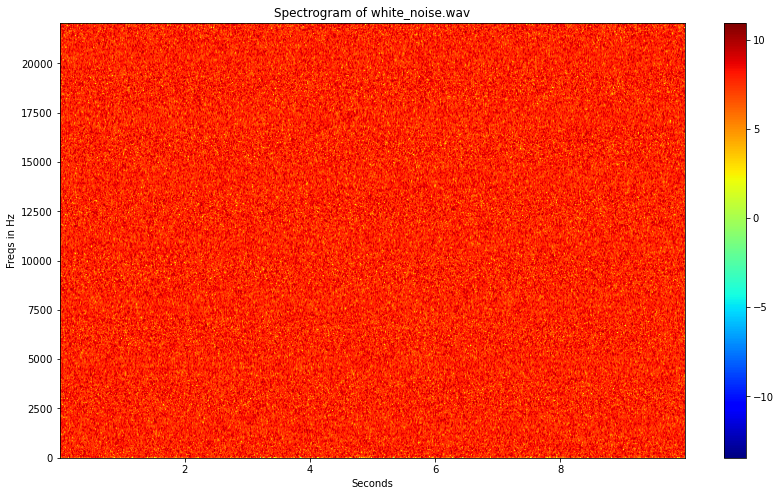

In [12]:
# White noise spectrogram

plot_spectrogram(folder, 'white_noise.wav')

## Rain sound (Amplified)

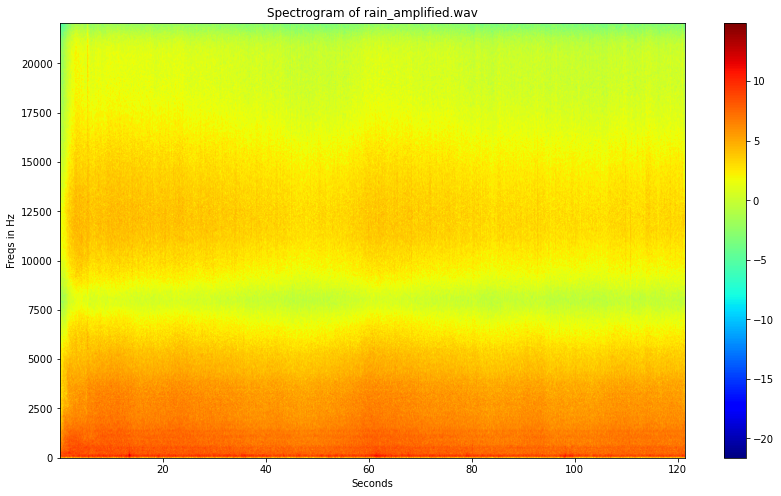

In [13]:
# Amplified rain spectrogram

plot_spectrogram(folder, 'rain_amplified.wav')

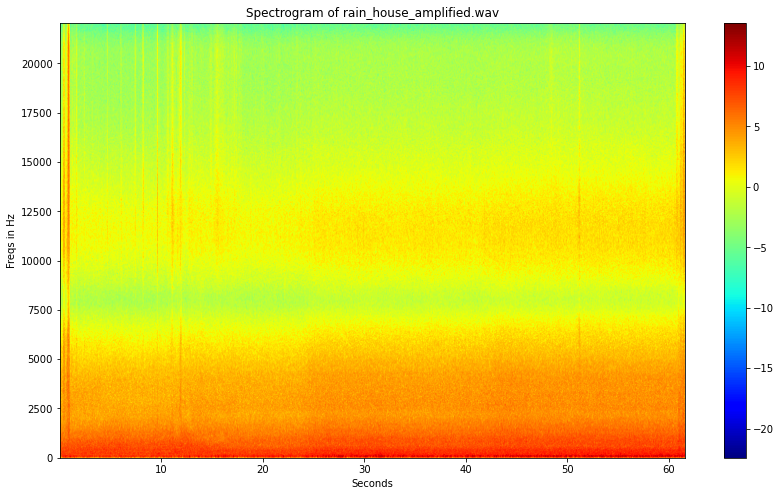

In [14]:
# Amplified rain (at house) spectrogram

plot_spectrogram(folder, 'rain_house_amplified.wav')

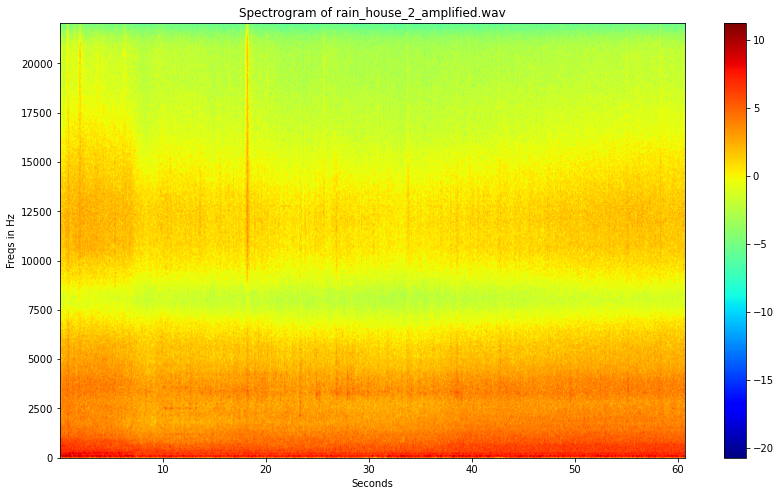

In [15]:
# Amplified rain (at house 2) spectrogram

plot_spectrogram(folder, 'rain_house_2_amplified.wav')